In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def C(eta0, sigma):
    coef = 6*math.pi*eta0*sigma
    return coef

In [3]:
def  f_t(C, eta0, N, s):
    f = 1/( (1/(N*C)) + ( s/(6*math.pi*(N**2)*eta0) ) )
    return f

In [4]:
def average_inverse_sum( position, N):
    i = 0
    j = 0
    s = 0
    for i in range(N):
        for j in range(N):
            if ( i == j ):
                s += 0
            else:
                r = r_ij(i, j, position)
                s += 1/r
    #s = s/N
    return s

In [5]:
def positions(Nx, Ny, sigma):
    position = {}
    i = 0
    j = 0
    m = 0
    for j in range(Ny):
        for i in range(Nx):
            x = sigma + 2 * i  * sigma
            y = sigma + 2 * j * sigma
            position.update({m:[x,y]})
            m += 1
    return position

In [6]:
def r_ij(i, j, position):
    distance = math.sqrt( ((position[i][0]-position[j][0])**2) + ((position[i][1]-position[j][1])**2) )
    return distance

In [7]:

m = 30
eta0 = 3.12e-5
sigma = 5e-9
sigmax = 5e-9
thc = 10e-9
width = 140e-9
s_array = []
sigma_array = []
N_array = []
f_array = []

In [8]:
for i in np.arange( 0, m):
    sigma_array.append(sigmax)
    Nx = int(width/(2*sigmax))
    Ny = int(thc/(2*sigmax))
    N = Nx * Ny
    N_array.append(N)
    const = C(eta0, sigmax)
    coord = positions(Nx, Ny, sigmax)
    s = average_inverse_sum(coord, N)
    s_array.append(s)
    friction = f_t(const, eta0, N, s)
    f_array.append(friction)
    sigmax = sigma/(i+2)

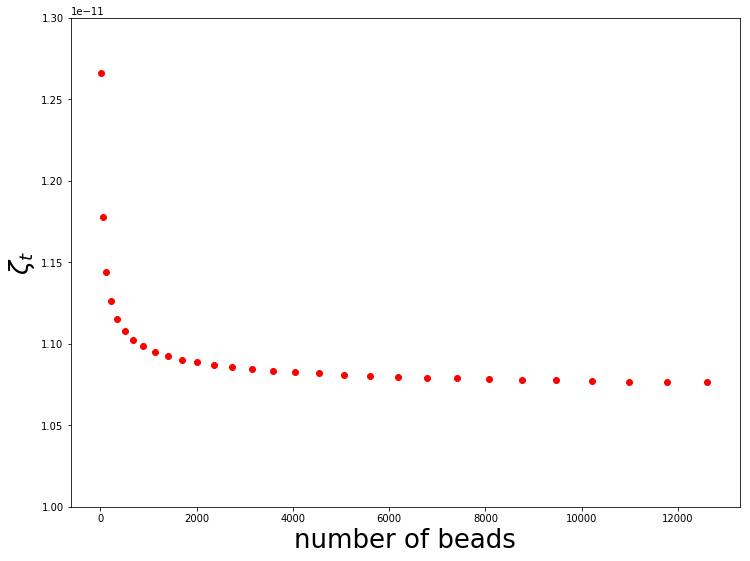

1.07622276841e-11


In [11]:
y = 1.3e-11
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('number of beads', fontsize = '26')
ax1.set_ylabel('$\zeta_{t}$', fontsize = '26')
for i in np.arange( 0, m ):
    ax1.scatter( N_array[i], f_array[i], color = 'r' )
    ax1.set_ylim( 1e-11 , y)
plt.show()
print (f_array[m-1])